# Définition de nouvelles features

Feature à calculer : 
- nb de chambres dispos à date j / nb de chambres dispos à date 44 pour chaque ville
(Sortie attendue : df avec colonne vide, colonne jour, colonne ratio calculé)

- Taille de l'hotel (nombre de chambres dispos au jour 44)

- Lien entre langue et ville demandée

- 

Merge avec autres features 

## Import librairies

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Chargement données

In [4]:
df = pd.read_csv('train_set.csv')
df

,hotel_id,price,stock,city,date,language,mobile,avatar_id,avatar_name,order_requests
0,768,286,13,madrid,11,portuguese,0,155051,8HOAWS,1
1,126,96,8,madrid,11,portuguese,0,155051,8HOAWS,1
2,378,124,0,madrid,11,portuguese,0,155051,8HOAWS,1
3,351,91,4,madrid,11,portuguese,0,155051,8HOAWS,1
4,747,172,15,madrid,11,portuguese,0,155051,8HOAWS,1
...,...,...,...,...,...,...,...,...,...,...
90858,67,187,12,madrid,1,croatian,1,177583,EBQKJS,859
90859,747,165,1,madrid,1,croatian,1,177583,EBQKJS,859
90860,135,354,1,madrid,1,croatian,1,177583,EBQKJS,859
90861,322,78,2,madrid,1,croatian,1,177583,EBQKJS,859


## Feature : Nombre de chambres dispos à date j / nb chambres dispos à date 44 pour une ville donnée

In [11]:
temp = df[(df['city']=='madrid')&(df['date']==44)]
temp

,hotel_id,price,stock,city,date,language,mobile,avatar_id,avatar_name,order_requests


‘amsterdam’, ‘copenhagen’, ‘madrid’, ‘paris’, ‘rome’, ‘sofia’, ‘valletta’, ‘vienna’ et ‘vilnius’.

In [57]:
df_d44 = df[df["date"] == 44]
df_d44["city"].value_counts()

amsterdam    405
vienna       212
paris        167
rome         129
sofia        112
valletta      96
vilnius       96
Name: city, dtype: int64

In [25]:
df_d44['hotel_id'].value_counts()

103    3
9      3
83     3
283    3
777    3
      ..
986    1
229    1
647    1
734    1
787    1
Name: hotel_id, Length: 737, dtype: int64

In [43]:
df_h = df_d44[df_d44['hotel_id']==103]
df_h

,hotel_id,price,stock,city,date,language,mobile,avatar_id,avatar_name,order_requests
32574,103,187,9,amsterdam,2,danish,0,156793,FI8VJK,301
41919,103,180,9,amsterdam,2,luxembourgish,1,156887,CWDLE5,395
87213,103,180,9,amsterdam,2,french,0,177552,2B2OFO,828


## Feature : taille de l'hôtel (nombre de chambres dispos à date 44)

In [44]:
df_d44["hotel_id"].nunique()

928

In [58]:
df_d44["stock"].nunique()

34

(array([262.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 267.,   0.,   0.,
          0., 287.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 185.,  46.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  46.,
        124.]), array([ 55.        ,  61.73529412,  68.47058824,  75.20588235,
         81.94117647,  88.67647059,  95.41176471, 102.14705882,
        108.88235294, 115.61764706, 122.35294118, 129.08823529,
        135.82352941, 142.55882353, 149.29411765, 156.02941176,
        162.76470588, 169.5       , 176.23529412, 182.97058824,
        189.70588235, 196.44117647, 203.17647059, 209.91176471,
        216.64705882, 223.38235294, 230.11764706, 236.85294118,
        243.58823529, 250.32352941, 257.05882353, 263.79411765,
        270.52941176, 277.26470588, 284.        ]), <a list of 34 Patch objects>)

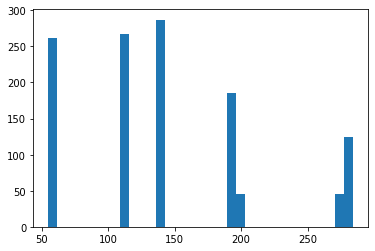

In [59]:
df_stock_by_h = df_d44[['hotel_id', 'stock']]

plt.hist(df_stock_by_h['stock'], bins=34)

In [55]:
df_stock_by_h['stock'].value_counts()

22     72
23     60
50     57
48     55
21     48
       ..
112     1
150     1
96      1
123     1
151     1
Name: stock, Length: 120, dtype: int64